In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df=pd.read_csv(r'/content/dataset.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df=df.drop(['dataset','id'],axis=1)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']:
    df[col].fillna(df[col].mean(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert target to binary: 0 = no disease, 1 = disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

<ipython-input-7-2a8c58aaf5e6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-7-2a8c58aaf5e6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df.info()
df.describe()
# df.rename(columns={'num': 'target'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  ca        920 non-null    float64
 12  thal      920 non-null    int64  
 13  num       920 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 100.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,0.782609,132.132404,199.130337,0.150000,0.990217,137.545665,0.366304,0.878788,1.152174,0.676375,1.158696,0.553261
std,9.424685,0.408148,0.956350,18.443895,108.957634,0.357266,0.631863,25.138494,0.482056,1.053774,0.516007,0.541667,0.483493,0.497426
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,177.750000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.676375,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,221.000000,0.000000,1.000000,138.000000,0.000000,0.800000,1.000000,0.676375,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,0.676375,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
X_train=df.iloc[:,:-1]
arr=[]
for i in X_train.columns:
  if X_train[i].std()==0:
    arr.append(i)
arr

[]

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
model

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
h=model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
correlations = df.corr(numeric_only=True)
print(correlations['num'].sort_values(ascending=False))

num         1.000000
exang       0.433605
oldpeak     0.372890
sex         0.307284
age         0.282700
ca          0.264936
thal        0.172942
fbs         0.108071
trestbps    0.102922
restecg     0.058783
slope      -0.205425
chol       -0.226467
thalch     -0.382942
cp         -0.385077
Name: num, dtype: float64


In [ ]:
def Evaluation(cm):
    print(cm)
    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]
    Sensitivity = TP/(TP + FN)  #accuracy of positive class or Recall
    print("Sensitivity",Sensitivity*100)
    Specificity = TN/(TN + FP)  #accuracy of positive class or Recall
    print("Specificity",Specificity*100)
    Precision = TP /(TP + FP) # out of all total positive decisions how many are correct
    print("Precision",Precision*100)
    F_Score = 2 * (Precision*Sensitivity)/(Precision + Sensitivity)
    print('F_Score',F_Score)
    Accuracy = (TP + TN)/(TP + FN + FP + TN) # out of all positive and negative classes predicted accuratly
    print('Accuracy',Accuracy*100)
    Balanced_Accuracy = (Sensitivity + Specificity)/ 2
    print('Balanced_Accuracy', Balanced_Accuracy*100)

In [ ]:
Train_cap = h.predict(X_train)
cm_train = confusion_matrix(y_train,Train_cap)
print("Train Dataset Metrics")
Evaluation(cm_train)

Train Dataset Metrics
[[268  68]
 [ 48 352]]
Sensitivity 79.76190476190477
Specificity 88.0
Precision 84.81012658227847
F_Score 0.8220858895705523
Accuracy 84.23913043478261
Balanced_Accuracy 83.8809523809524


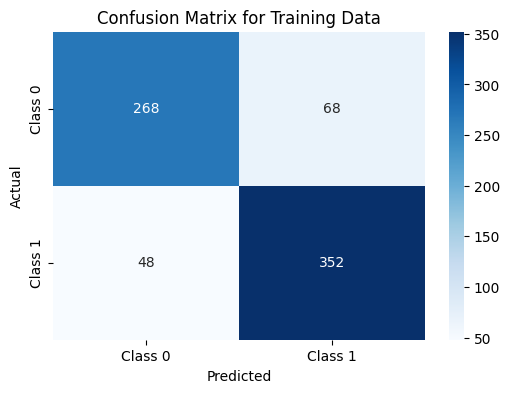

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Data')
plt.show()

In [25]:
Test_cap = h.predict(X_test)
cm_test = confusion_matrix(y_test,Test_cap)
print("Test Dataset Metrics")
Evaluation(cm_test)

Test Dataset Metrics
[[60 15]
 [22 87]]
Sensitivity 80.0
Specificity 79.81651376146789
Precision 73.17073170731707
F_Score 0.7643312101910827
Accuracy 79.8913043478261
Balanced_Accuracy 79.90825688073396


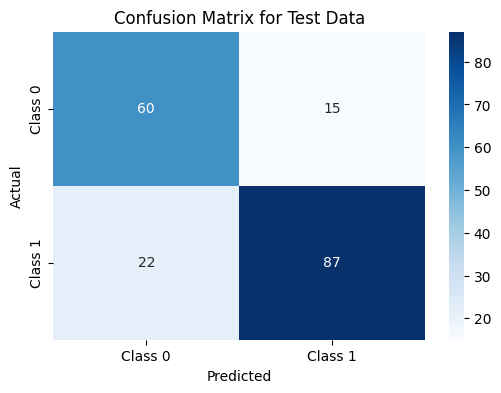

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Data')
plt.show()


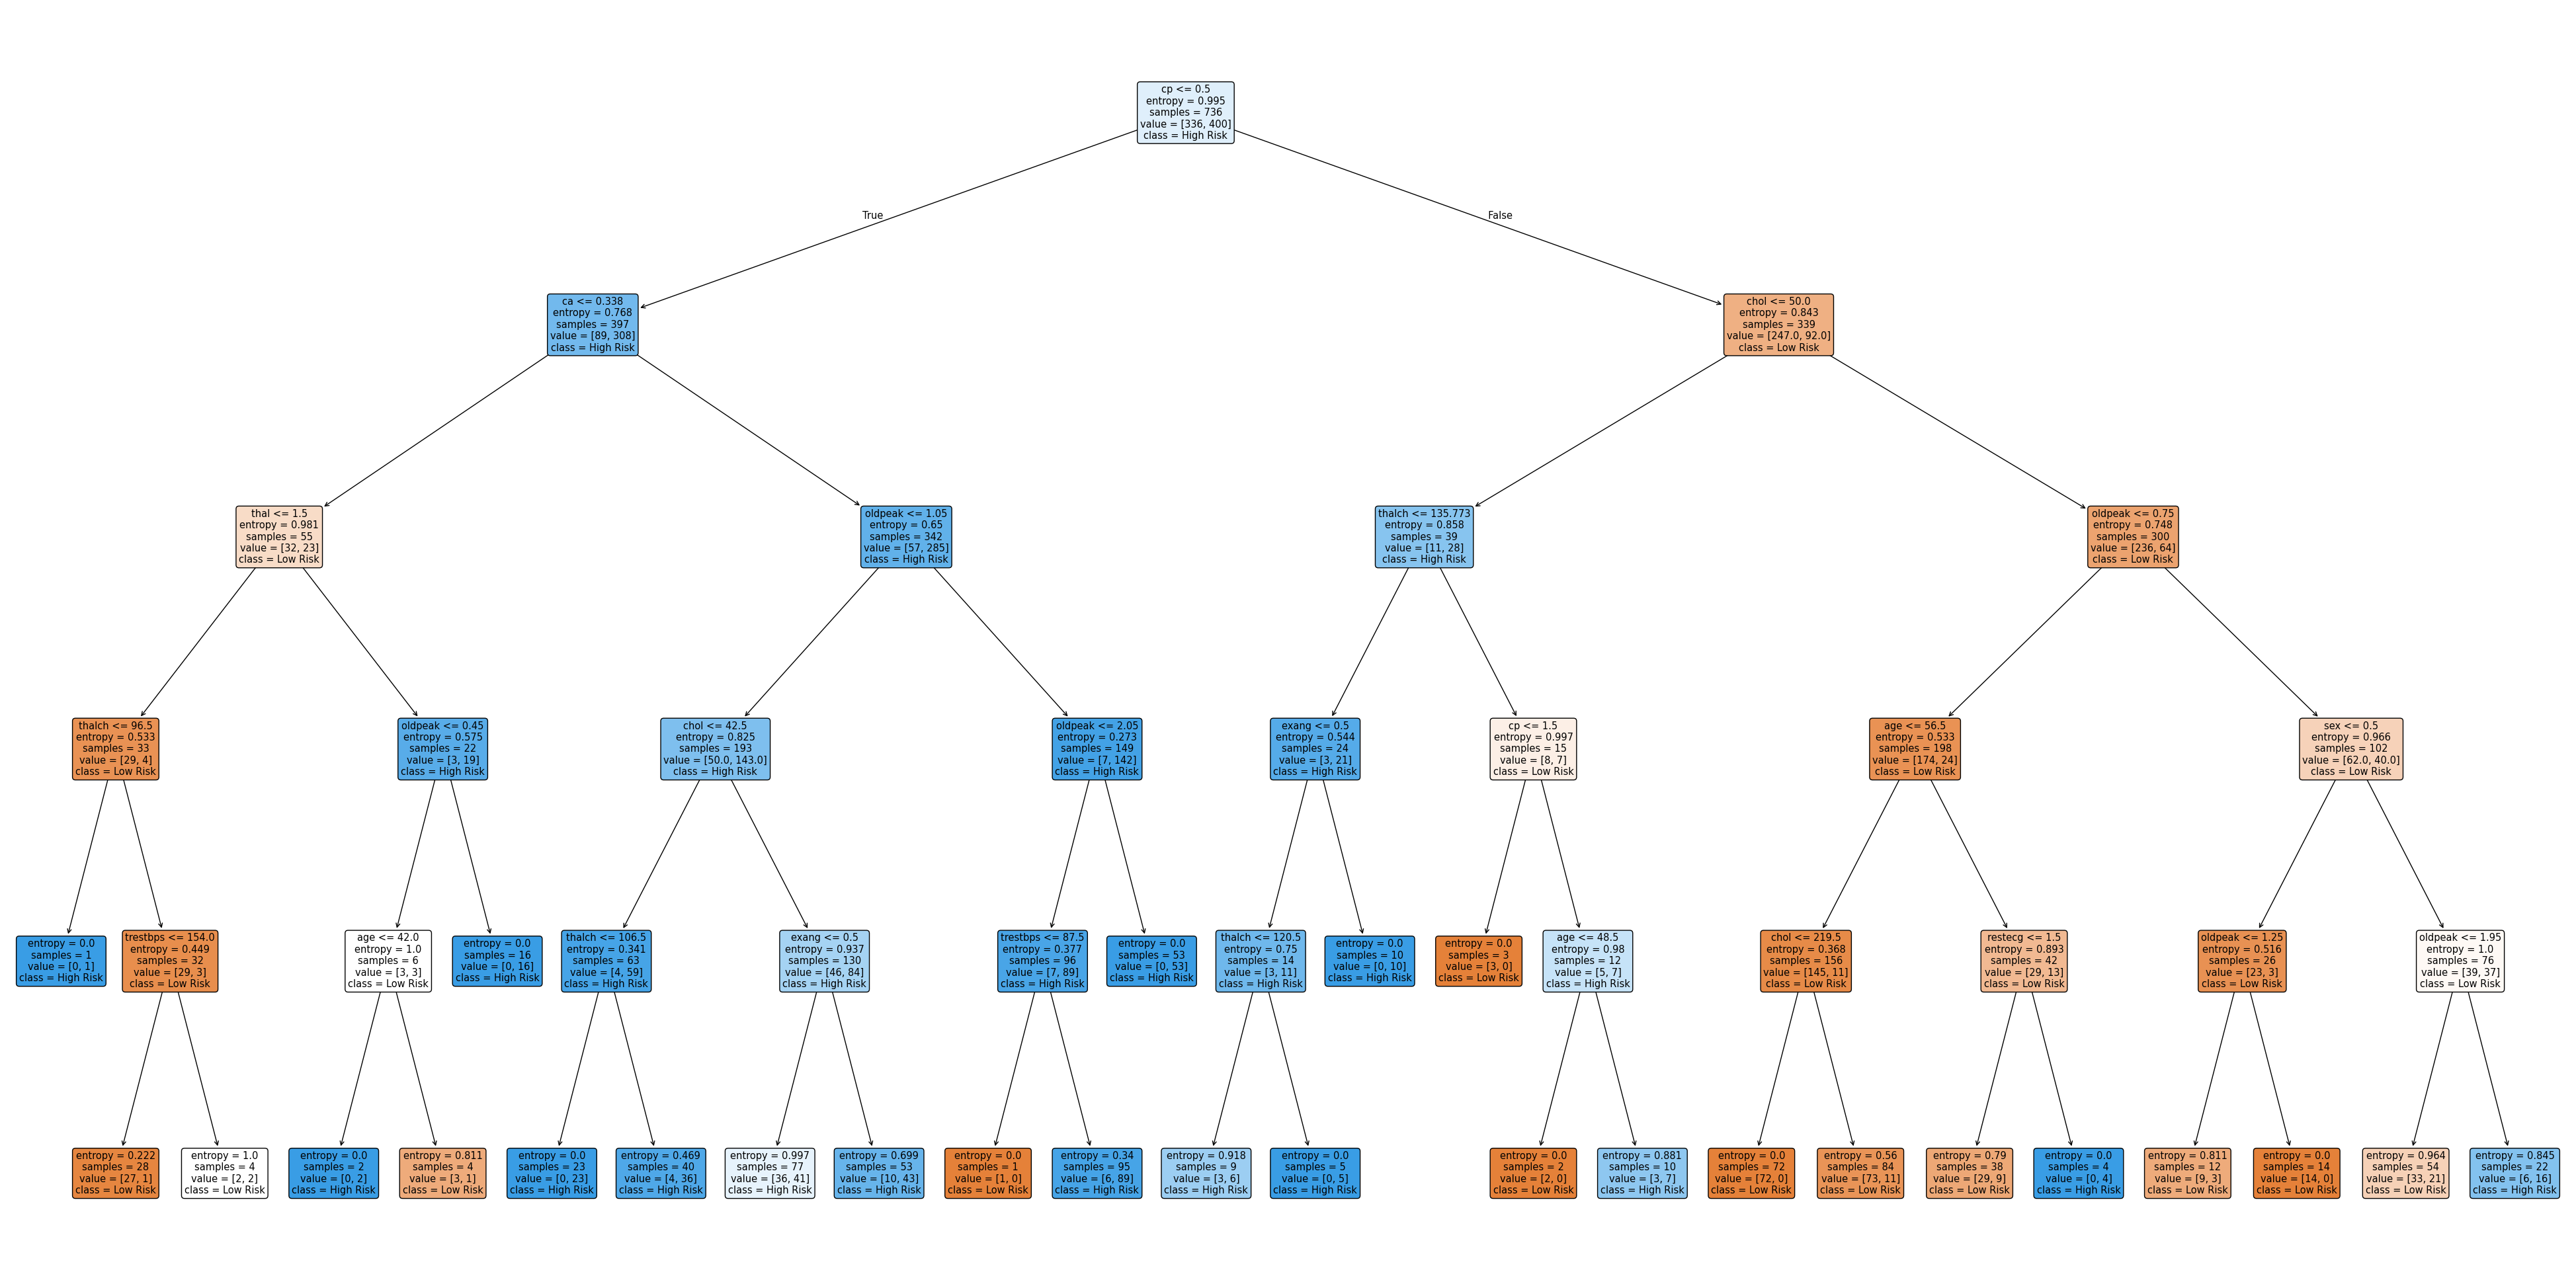

In [26]:
#plotting the decision tree
plt.figure(figsize=(50, 25))
plot_tree(model, feature_names=X_train.columns, class_names=['Low Risk', 'High Risk'], filled=True, rounded=True)
plt.show()

In [27]:
importances = model.feature_importances_
feature_names = X_train.columns  # if X_train is a pandas DataFrame
feature_importance_dict = dict(zip(feature_names, importances))
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")


cp: 0.3810
oldpeak: 0.1656
chol: 0.1434
ca: 0.0753
thal: 0.0625
age: 0.0431
thalch: 0.0360
exang: 0.0280
sex: 0.0242
trestbps: 0.0211
restecg: 0.0197
fbs: 0.0000
slope: 0.0000


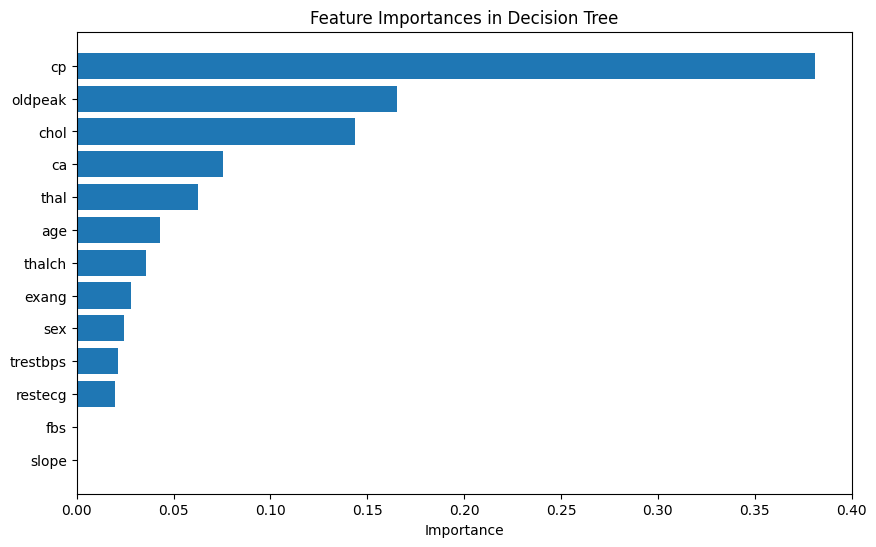

In [28]:
import matplotlib.pyplot as plt

# Sorting again to plot nicely
features = [f[0] for f in sorted_importances]
importances = [f[1] for f in sorted_importances]

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Highest at top
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression()
h1 = model1.fit(X_train,y_train)
Train_cap1 = h1.predict(X_train)
cm_train1 = confusion_matrix(y_train,Train_cap1)
print("Train Dataset Metrics")
Evaluation(cm_train1)

Train Dataset Metrics
[[275  61]
 [ 66 334]]
Sensitivity 81.84523809523809
Specificity 83.5
Precision 80.64516129032258
F_Score 0.8124076809453471
Accuracy 82.74456521739131
Balanced_Accuracy 82.67261904761905


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Test_cap1 = h1.predict(X_test)
cm_test1 = confusion_matrix(y_test,Test_cap)
print("Test Dataset Metrics")
Evaluation(cm_test1)

Test Dataset Metrics
[[60 15]
 [22 87]]
Sensitivity 80.0
Specificity 79.81651376146789
Precision 73.17073170731707
F_Score 0.7643312101910827
Accuracy 79.8913043478261
Balanced_Accuracy 79.90825688073396


In [32]:
# Train SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
h3=svm_model.fit(X_train, y_train)

# Predictions
Train_cap3 = h3.predict(X_train)
cm_train3 = confusion_matrix(y_train,Train_cap3)
print("Train Dataset Metrics")
Evaluation(cm_train3)

Train Dataset Metrics
[[237  99]
 [117 283]]
Sensitivity 70.53571428571429
Specificity 70.75
Precision 66.94915254237289
F_Score 0.6869565217391305
Accuracy 70.65217391304348
Balanced_Accuracy 70.64285714285714


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
Test_cap3 = h3.predict(X_test)
cm_test3 = confusion_matrix(y_test,Test_cap3)
print("Test Dataset Metrics")
Evaluation(cm_test3)

Test Dataset Metrics
[[55 20]
 [31 78]]
Sensitivity 73.33333333333333
Specificity 71.55963302752293
Precision 63.95348837209303
F_Score 0.6832298136645963
Accuracy 72.28260869565217
Balanced_Accuracy 72.44648318042813


In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you already have:
# y_test → ground truth
# dt_preds → predictions from Decision Tree
# lr_preds → predictions from Logistic Regression
# svm_preds → predictions from SVM

# Create a comparison DataFrame
results = {
    "Model": ["Decision Tree", "Logistic Regression", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, Test_cap),
        accuracy_score(y_test, Test_cap1),
        accuracy_score(y_test, Test_cap3)
    ],
    "Precision": [
        precision_score(y_test, Test_cap),
        precision_score(y_test, Test_cap1),
        precision_score(y_test, Test_cap3)
    ],
    "Recall": [
        recall_score(y_test, Test_cap),
        recall_score(y_test, Test_cap1),
        recall_score(y_test, Test_cap3)
    ],
    "F1 Score": [
        f1_score(y_test, Test_cap),
        f1_score(y_test, Test_cap1),
        f1_score(y_test, Test_cap3)
    ]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.798913   0.852941  0.798165  0.824645
1  Logistic Regression  0.777174   0.846939  0.761468  0.801932
2                  SVM  0.722826   0.795918  0.715596  0.753623


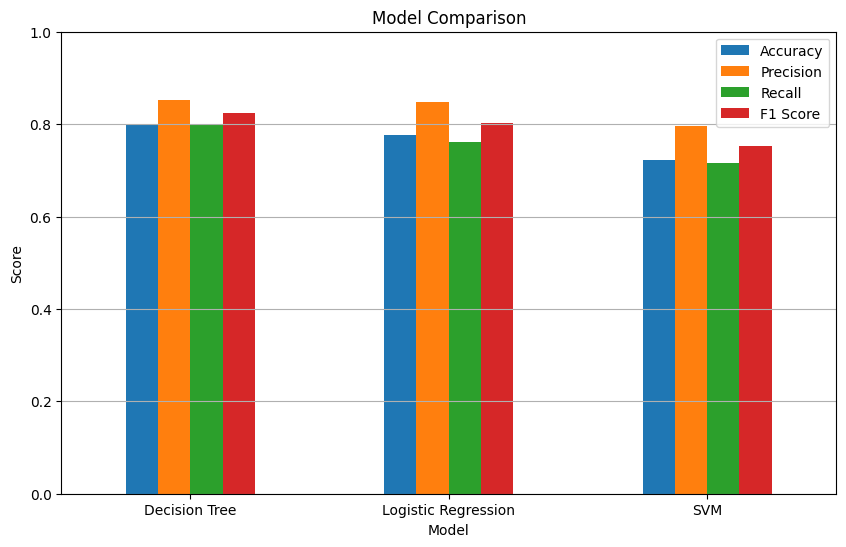

In [35]:
import matplotlib.pyplot as plt

comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


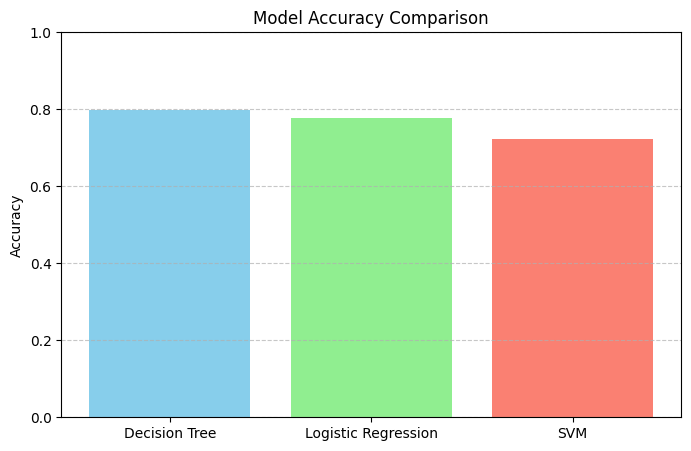

In [39]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [
    accuracy_score(y_test, Test_cap),
    accuracy_score(y_test, Test_cap1),
    accuracy_score(y_test, Test_cap3)
]

models = ['Decision Tree', 'Logistic Regression', 'SVM']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
with open('heart_disease_models.pkl', 'wb') as f:
    pickle.dump(h, f)


In [45]:
from google.colab import files

files.download('heart_disease_models.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>